# Process data

In [1]:
import pandas as pd
import duckdb
import missingno as msno
import matplotlib.pyplot as plt
import os

In [2]:
# parameters
input_data_path = os.getenv('INPUT_PATH')
output_data_path_1 = os.getenv('OUTPUT_PATH_1')
output_data_path_2 = os.getenv('OUTPUT_PATH_2')
output_data_path_3 = os.getenv('OUTPUT_PATH_3')

## Load data

In [3]:
raw_data = pd.read_csv(input_data_path)

/var/folders/tn/xpr0bd8x39d87tc_djfk2p2w0000gn/T/ipykernel_50314/639593027.py:1: DtypeWarning: Columns (1,3,4,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(input_data_path)


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568486 entries, 0 to 568485
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           568486 non-null  int64  
 1   by           303057 non-null  object 
 2   type         568486 non-null  object 
 3   time_ts      312898 non-null  object 
 4   title        55611 non-null   object 
 5   parent       254379 non-null  float64
 6   descendants  52272 non-null   float64
 7   score        55966 non-null   float64
 8   ranking      254800 non-null  float64
 9   dead         14991 non-null   object 
 10  deleted      9841 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 47.7+ MB


In [5]:
duck_con = duckdb.connect()

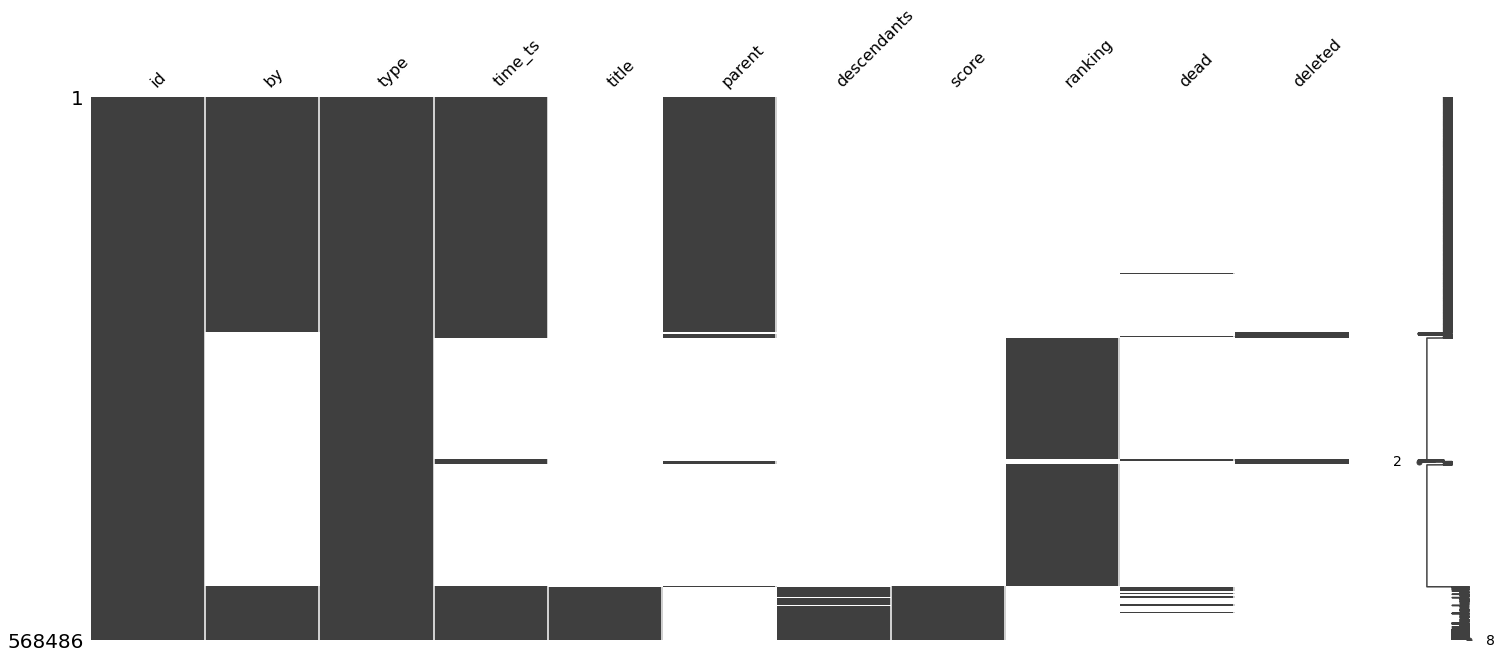

In [6]:
msno.matrix(raw_data)
plt.savefig(output_data_path_1)

## Process data

In [7]:
df_filter = duck_con.execute(
'''
SELECT
    id, 
    by, 
    time_ts,
    title, 
    COALESCE(descendants, 0) AS descendants,
    COALESCE(score, 0) AS score,
    dead
FROM raw_data
WHERE title IS NOT NULL
AND title <> 'Placeholder'
AND type == 'story'
'''
).fetch_df()

In [8]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55372 entries, 0 to 55371
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55372 non-null  int64  
 1   by           55372 non-null  object 
 2   time_ts      55372 non-null  object 
 3   title        55372 non-null  object 
 4   descendants  55372 non-null  float64
 5   score        55372 non-null  float64
 6   dead         11618 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.0+ MB


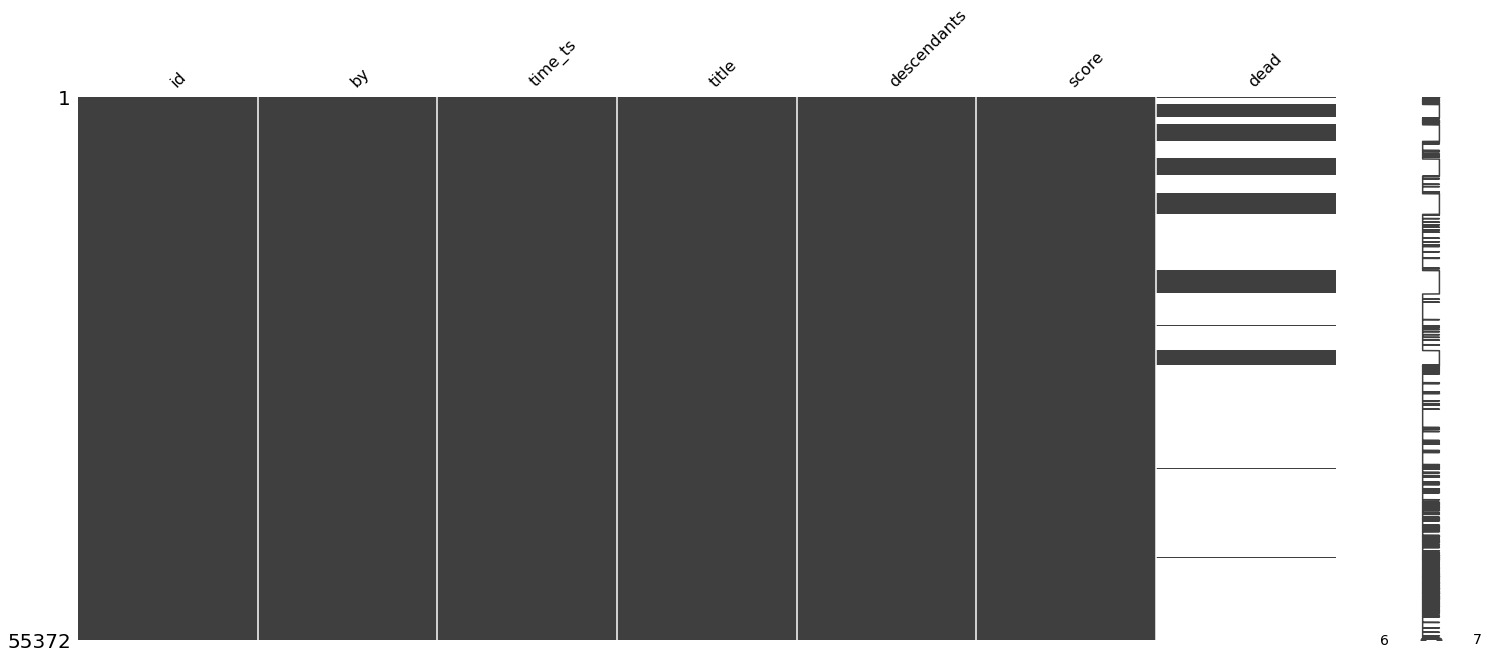

In [9]:
msno.matrix(df_filter)
plt.savefig(output_data_path_1)

## Output

In [10]:
df_filter.to_csv(output_data_path_3, index=False)